In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error
%matplotlib inline

In [81]:
data_seet= pd.read_csv(r'C:\Users\suraj\python\Project_SML\diabetic_data.csv')
df=pd.DataFrame(data_seet)

df=df.replace("?",np.nan)
dropping=df.isnull().sum()[df.isnull().sum()>1]/len(df)*100
df.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'],axis=1,inplace=True)

Daibetics_DattaM = df
Daibetics_DattaM.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [84]:
Daibetics_DattaM['metformin']

-0.449191    81778
 1.847336    18346
 4.143862     1067
-2.745717      575
Name: metformin, dtype: int64

In [ ]:
No        81778
Steady    18346
Up         1067
Down        575

In [71]:
def ScallingAll(Data_In):
    scaler = StandardScaler()
    Data_Features=Data_In
    #Data_Features=pd.DataFrame(Data_In)
    Data_objects = Data_Features.select_dtypes(exclude=['int64'])
    
    col_list = list(Data_objects.columns)
    for col in col_list:
        Data_Features[col] = pd.Categorical( Data_objects[col])
        Data_Features[col] = Data_Features[col].cat.codes
        
    Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    
    
    return Data_Features
    raise NotImplementedError
    
    
    

    
def Scalling(Data_In):
    scaler = StandardScaler()
    #scaler = MinMaxScaler()
    Data_Features=Data_In
    #Data_Features=pd.DataFrame(Data_In)
    
    Data_objects = Data_Features.select_dtypes(exclude=['int64'])
    Data_Readd = Data_Features['readmitted']   
    Data_Readd = Data_Readd.replace({"NO":0,"<30":1,">30":0})
    Data_Features = Data_Features.drop(['readmitted'],axis=1)
    
    col_list = list(Data_objects.columns)
    for col in col_list:
        Data_Features[col] = pd.Categorical( Data_objects[col])
        Data_Features[col] = Data_Features[col].cat.codes
        
    

        
    #Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    
    Data_Features['readmitted'] = Data_Readd
    
    return Data_Features
    raise NotImplementedError

In [83]:
# SCAllING AND SENSITIVITY ANALYSIS OF FEATURES WITH READMISSION 

Data_scalled= Scalling(Daibetics_DattaM)

Holding_Data = Data_scalled[100000:101765]
Model_Data = Data_scalled[:99999]

Data_scalledc=ScallingAll(Daibetics_DattaM)

Readmitted_Data=Model_Data['readmitted']

CorrelationR = Model_Data.corrwith(Readmitted_Data)
CorrelationR=CorrelationR.dropna()

raddmit = abs( CorrelationR)
raddmit = raddmit.drop('readmitted')

Redd=raddmit[(raddmit>0.02)]
#Redd

Redd=pd.DataFrame(Redd)
features=list(Redd.transpose().columns)


In [78]:

features

['discharge_disposition_id',
 'time_in_hospital',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'metformin',
 'diabetesMed']

In [23]:
def Data_out(features,n):
    #Total Training data set with all opts

    X_main = Model_Data[features]
    Y_main = Model_Data['readmitted']

    #Equal proportion opt data set
    #11161[:11161]
    Sort_data_0=Model_Data[Model_Data['readmitted'] == 0][:(11161*n)]
    Sort_data_1=Model_Data[Model_Data['readmitted'] == 1]
    Sort_data = pd.concat([Sort_data_1,Sort_data_0],axis = 0)

    X_main_S = Sort_data[features]
    Y_main_S = Sort_data['readmitted']

    # Validation Data Set
    X_valid = Holding_Data[features]
    Y_valid = Holding_Data['readmitted']
    
    main = [X_main,Y_main]
    S_main = [X_main_S,Y_main_S]
    valid =[X_valid,Y_valid]
    
    return  [main,S_main,valid]


In [24]:
from tabulate import tabulate

# a= y predicted_data  b= y_data

def conf_table(a,b):
    cm = confusion_matrix(y_pred = a,y_true = b[:], labels=[0,1])
    rows = np.array([["Actual Failures"], ["Actual Successfull"]])
    rows = np.concatenate((rows,cm), axis=1)
    headers = ["No. of Samples", "Predicted Failure", "Predicted Successfull"]
    table = tabulate(rows,headers, tablefmt="grid")

    return print(table)

In [25]:
## NORMAL DEFULT MAIN MODEL ANALYSIS##

[main,S_main,valid] = Data_out(features,7)
X_main_S = S_main[0]
Y_main_S = S_main[1]
X_valid = valid[0]
Y_valid = valid [1] 
X_train, X_test, y_train, y_test = train_test_split(X_main_S,Y_main_S , test_size=0.2, random_state=101)

#Default Model Random Forest Analysis

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
#lm.fit(X_train,y_train)

rfc.fit(X_test,y_test)

rfc.fit(X_main_S,Y_main_S)

rfc.fit(X_valid,Y_valid)

print('***Results of RF***')
print('\n')
print('Score_Model_train:   ',rfc.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',rfc.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',rfc.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation/Holding:   ',rfc.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

RF_predictions = rfc.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,RF_predictions)
mae = mean_absolute_error(Y_valid,RF_predictions)
print('***Analysis of RF _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
RF_pred_test = rfc.predict(X_test)
RF_pred_train = rfc.predict(X_train)
RF_pred_hold = rfc.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of Random Forest  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_train,y_train)
print('\n')
print(classification_report(y_train,RF_pred_train))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_test,y_test)
print('\n')
print(classification_report(y_test,RF_pred_test))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,RF_pred_hold))
print('\n')

***Results of RF***


Score_Model_train:    0.8592468150636987


Score_Model_test:    0.8575988352559077


Score_Model_All_Main:    0.85891721171938


Score_Validation/Holding:    0.9869688385269122




***Analysis of RF _ Test_ Data***


MSE: 0.013031161473087818


MAE: 0.013031161473087818




------------------------------------------------
***Analysis of Random Forest  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               61084 |                    1420 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8634 |                     292 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

  

-----------------------------------------------------
****DEFAULT FEATURE IMPORTANCE AFTER MODEL TRAINING****
-----------------------------------------------------


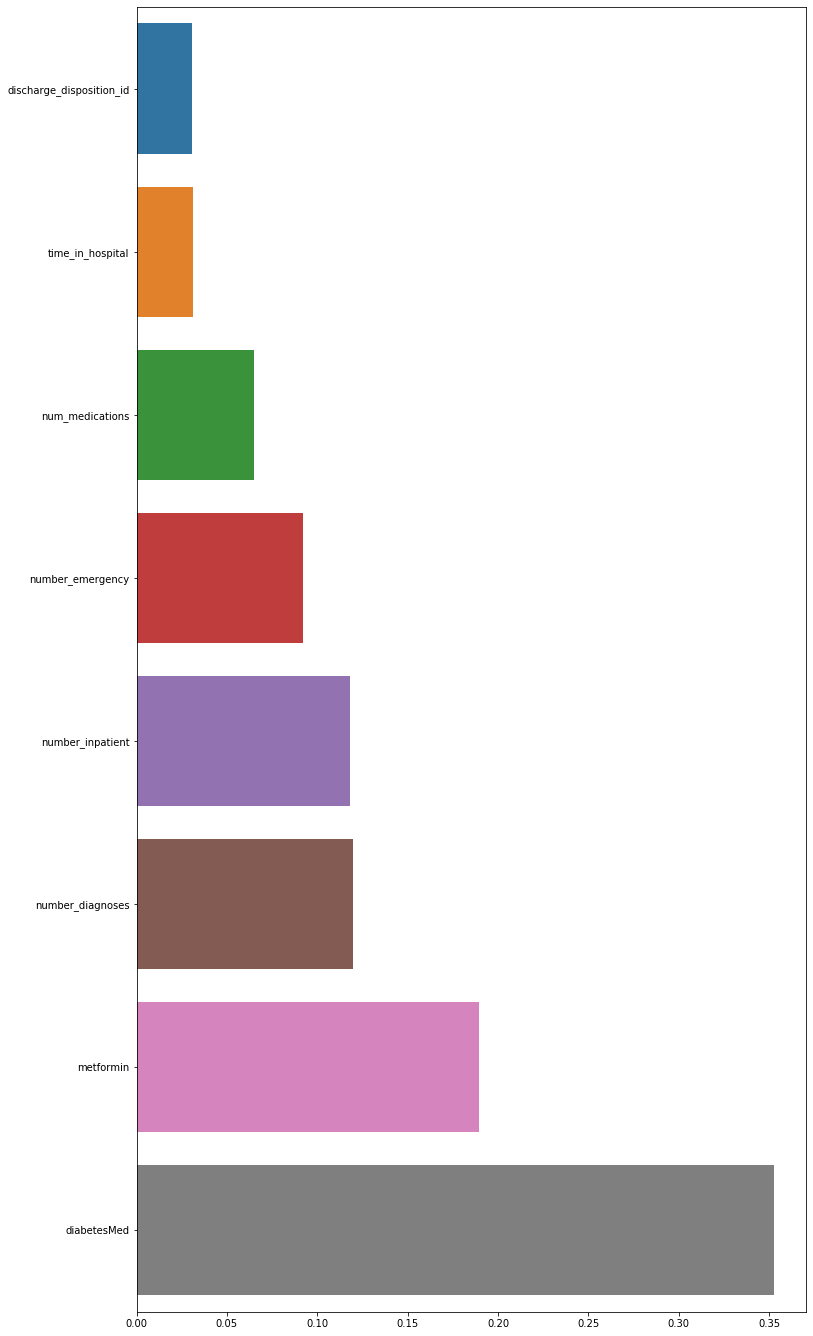

In [26]:
# DEFAULT FEATURE IMPORTANCE AFTER MODEL TRAINING
print('-----------------------------------------------------')
print('****DEFAULT FEATURE IMPORTANCE AFTER MODEL TRAINING****')
print('-----------------------------------------------------')
plt.figure(figsize=(12,24))
sns.barplot(sorted(rfc.feature_importances_),X_valid.columns)

-----------------------------------------------------
****DEFAULT ERROR RATE VS N_ESTIMATORS PLOT****
-----------------------------------------------------


Text(0, 0.5, 'Error Rate')

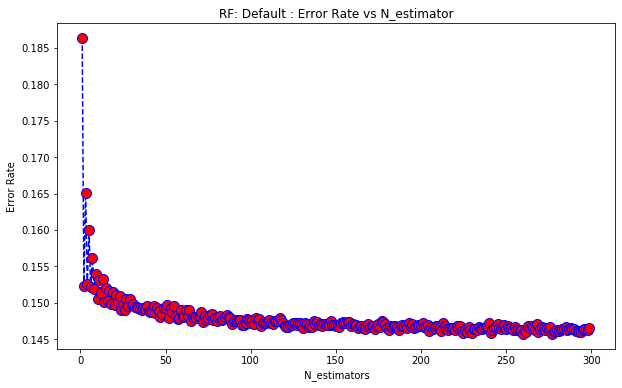

In [27]:
# DEFAULT ERROR RATE VS N_ESTIMATORS PLOT

rfc_results = pd.DataFrame(clf_RF.cv_results_)

error_dtrate=1-(rfc_results['mean_test_score'])
print('-----------------------------------------------------')
print('****DEFAULT ERROR RATE VS N_ESTIMATORS PLOT****')
print('-----------------------------------------------------')
plt.figure(figsize=(10,6))
plt.plot(rfc_results['param_n_estimators'],error_dtrate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RF: Default : Error Rate vs N_estimator')
plt.xlabel(' N_estimators')
plt.ylabel('Error Rate')

In [33]:
## OPTIMIZATION OF RF MODEL ##

[main,S_main,valid] = Data_out(features,7)
X_main_S = S_main[0]
Y_main_S = S_main[1]
X_valid = valid[0]
Y_valid = valid [1] 
X_train, X_test, y_train, y_test = train_test_split(X_main_S,Y_main_S , test_size=0.2, random_state=101)

#Main Model Random Forest Analysis

rfc = RandomForestClassifier()
Parameter_grid_RF = [{'n_estimators': np.arange(0,300,1) }]

#np.linspace(20000,1000,20)

clf_RF = GridSearchCV(rfc, Parameter_grid_RF,cv=3,verbose=3,n_jobs=4)

Best_Clf_RF = clf_RF.fit(X_train,y_train)

###########_______________________________________________________________________________________________________________
print('\n')
print(Best_Clf_RF.best_params_)
print('\n')
rfc_T = Best_Clf_RF.best_estimator_

rfc_T.fit(X_train,y_train)
#lm.fit(X_train,y_train)

rfc_T.fit(X_test,y_test)

rfc_T.fit(X_main_S,Y_main_S)

rfc_T.fit(X_valid,Y_valid)

print('***Results of RF***')
print('\n')
print('Score_Model_train:   ',rfc_T.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',rfc_T.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',rfc_T.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation/Holding:   ',rfc_T.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

RF_predictions = rfc_T.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,RF_predictions)
mae = mean_absolute_error(Y_valid,RF_predictions)
print('***Analysis of RF _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
RF_pred_test = rfc_T.predict(X_test)
RF_pred_train = rfc_T.predict(X_train)
RF_pred_hold = rfc_T.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of Random Forest  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_train,y_train)
print('\n')
print(classification_report(y_train,RF_pred_train))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_test,y_test)
print('\n')
print(classification_report(y_test,RF_pred_test))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,RF_pred_hold))
print('\n')

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   59.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed: 16.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 39.3min
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed: 50.6min finished




{'n_estimators': 293}


***Results of RF***


Score_Model_train:    0.8612487750244995


Score_Model_test:    0.8612386605442939


Score_Model_All_Main:    0.8612467520831467


Score_Validation/Holding:    0.9875354107648725




***Analysis of RF _ Test_ Data***


MSE: 0.012464589235127478


MAE: 0.012464589235127478




------------------------------------------------
***Analysis of Random Forest  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               61264 |                    1240 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8671 |                     255 |
+--------------------+---------------------+-------------------------+


              precision    re

-----------------------------------------------------
****DEFAULT FEATURE IMPORTANCE AFTER MODEL TRAINING****
-----------------------------------------------------


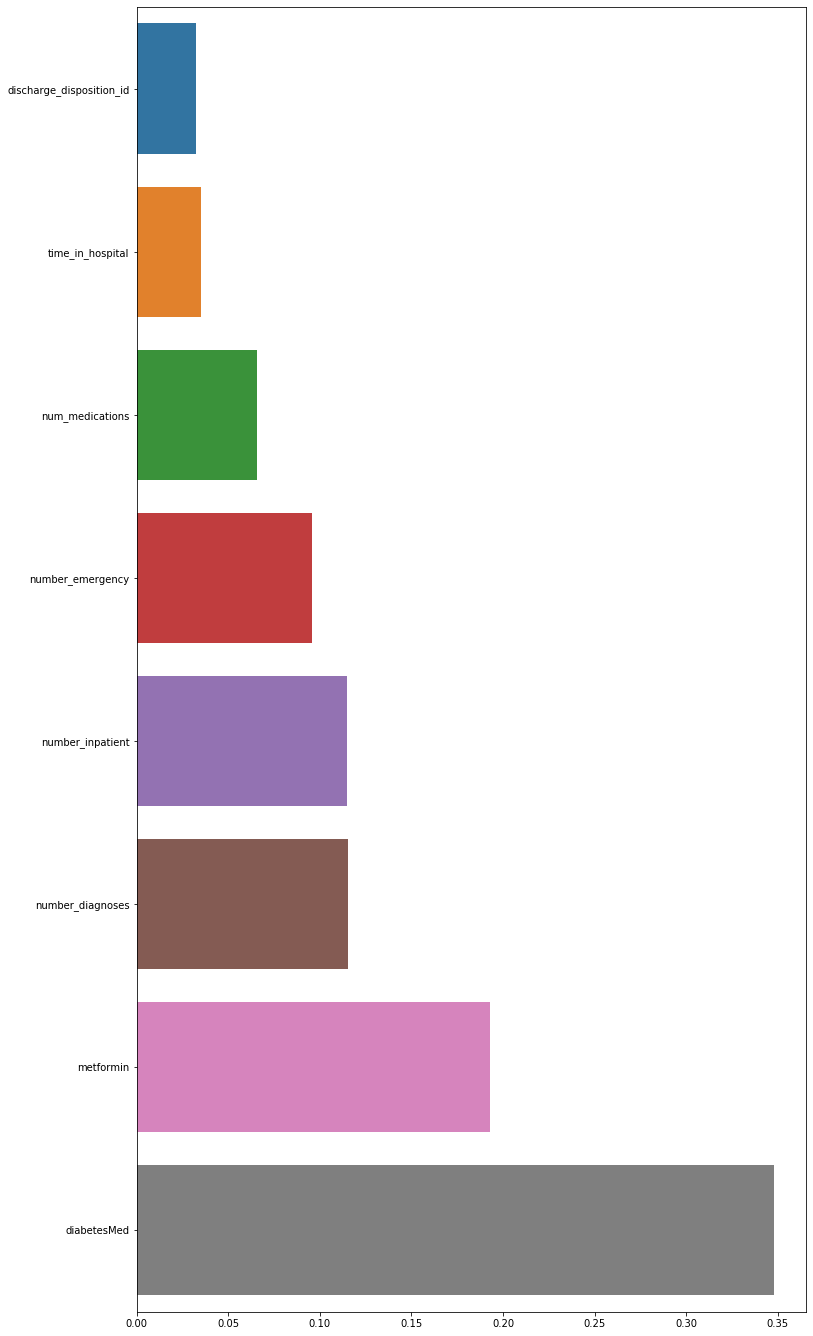

In [35]:
# AFTER OPTIMIZATION FEATURE IMPORTANCE AFTER MODEL TRAINING
print('-----------------------------------------------------')
print('****DEFAULT FEATURE IMPORTANCE AFTER MODEL TRAINING****')
print('-----------------------------------------------------')
plt.figure(figsize=(12,24))
sns.barplot(sorted(rfc_T.feature_importances_),X_valid.columns)

-----------------------------------------------------
****ATER OPTIMIZATION ERROR RATE VS N_ESTIMATORS PLOT****
-----------------------------------------------------


Text(0, 0.5, 'Error Rate')

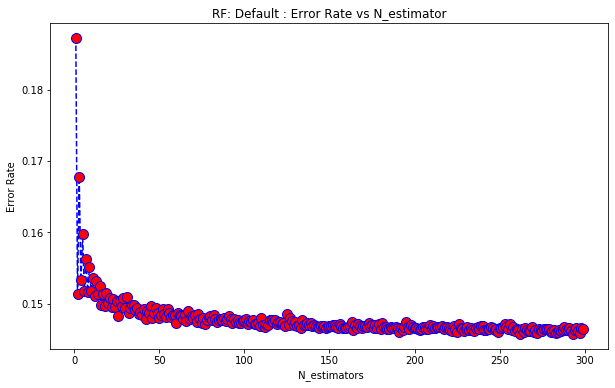

In [36]:
# ATER OPTIMIZATION ERROR RATE VS N_ESTIMATORS PLOT

rfc_results = pd.DataFrame(clf_RF.cv_results_)

error_dtrate=1-(rfc_results['mean_test_score'])
print('-----------------------------------------------------')
print('****ATER OPTIMIZATION ERROR RATE VS N_ESTIMATORS PLOT****')
print('-----------------------------------------------------')
plt.figure(figsize=(10,6))
plt.plot(rfc_results['param_n_estimators'],error_dtrate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RF: Default : Error Rate vs N_estimator')
plt.xlabel(' N_estimators')
plt.ylabel('Error Rate')

In [37]:
from sklearn.externals import joblib
import pickle

In [54]:
## Trained Model Saving ##
filename = "Diabetes_Readmission_Completed_model.joblib"
joblib.dump(rfc_T, filename)

['Diabetes_Readmission_Completed_model.joblib']